<a href="https://colab.research.google.com/github/santoshreddy48/EECE5644-Fall-2019/blob/master/sol1_HW4_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:

import numpy as np
import cv2

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



Populating the interactive namespace from numpy and matplotlib


In [0]:
def normalize(x):
    return x/((x.max()-x.min())*1.0)

In [0]:
def segment(img):

  f_vector = []
  for row in range(0,img.shape[0]):
    for col in range(0,img.shape[1]):
      temp = []
      r, g, b = img[row][col]
      temp.append(r)
      temp.append(g)
      temp.append(b)
      temp.append(row)
      temp.append(col)

      f_vector.append(temp)

  f_vector1 = np.array(f_vector)
  f_vector2 = f_vector1.reshape(img.shape[0],img.shape[1],5)

  f_vector2=f_vector2*1.0
  for channel in range(f_vector2.shape[2]):
      f_vector2[:,:,channel]=(normalize(f_vector2[:,:,channel]))

  f_vector3 = f_vector2.reshape(img.shape[0] * img.shape[1],5)

  for k in (2,3,4,5):
    km = KMeans(n_clusters=k, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
    seg = km.fit_predict(f_vector3)
    segImg = seg.reshape(img.shape[0],img.shape[1])
    plt.figure(figsize=(10,10))
    plt.title('K-Means segmented Image with K = %i'%k)
    plt.imshow(segImg)
    plt.show()


  for k in (2,3,4,5):
        
    gmm = GaussianMixture(n_components=k).fit(f_vector3)
    labels = gmm.predict(f_vector3)
    segImg=(labels.reshape(img.shape[0],img.shape[1]))
    plt.figure(figsize=(10,10))
    plt.title('GMM segmented Image with K = %i'%k)
    plt.imshow(segImg)
    plt.show()


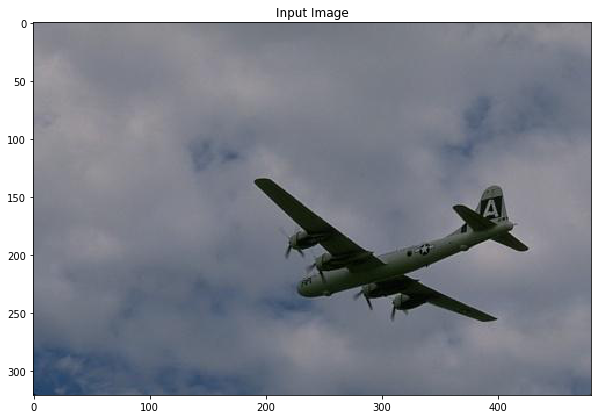

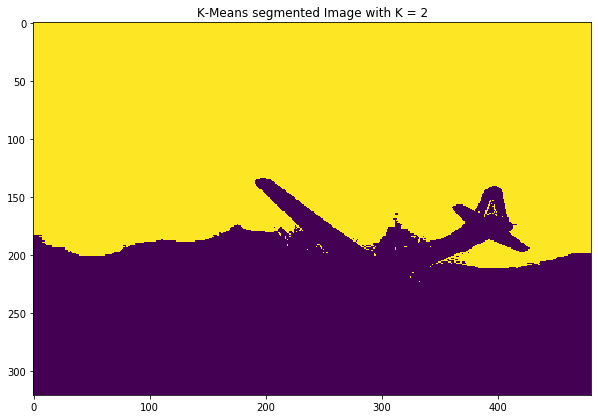

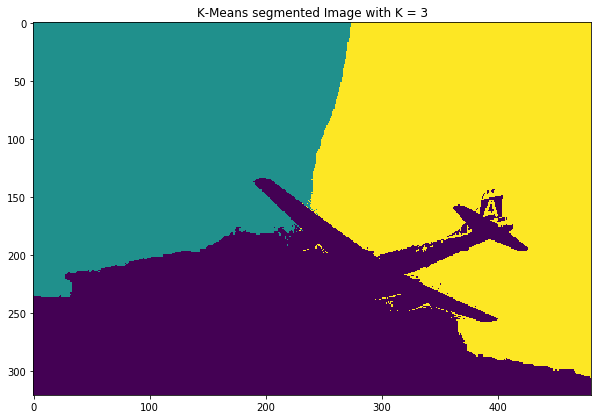

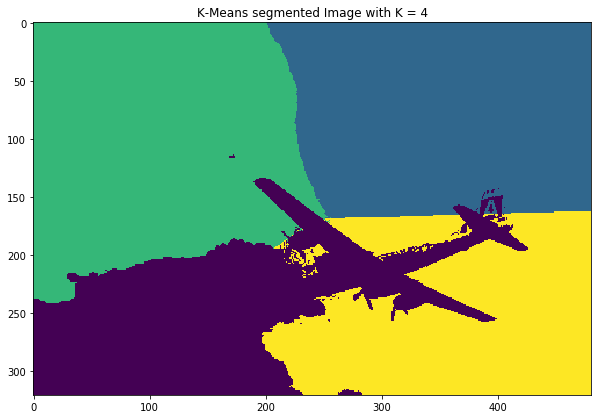

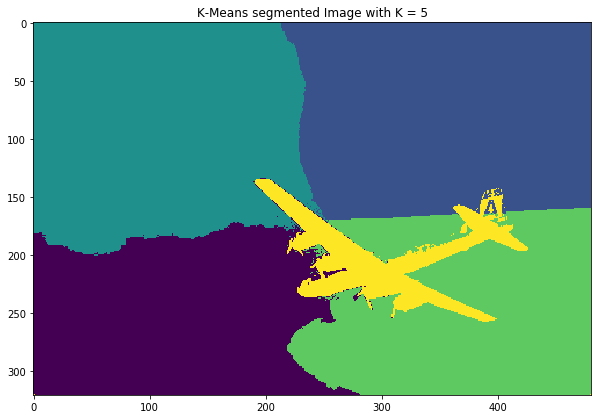

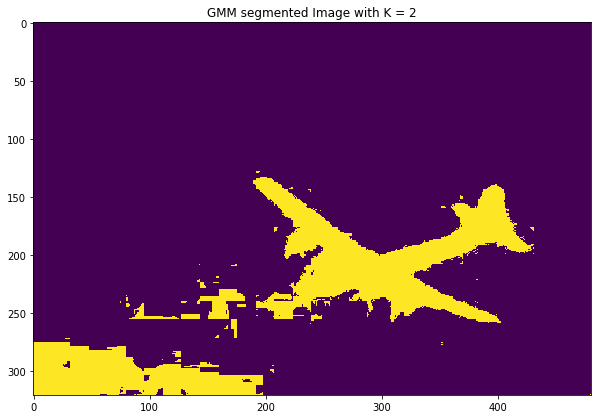

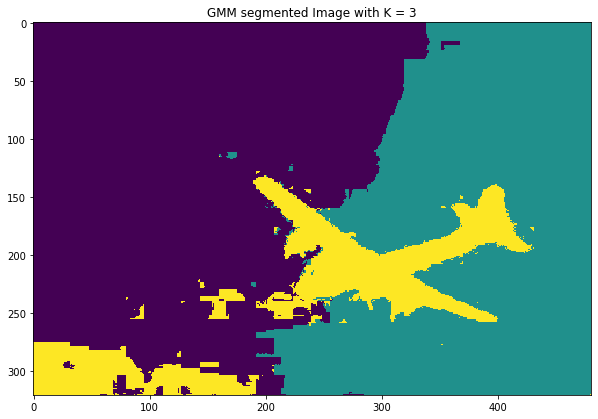

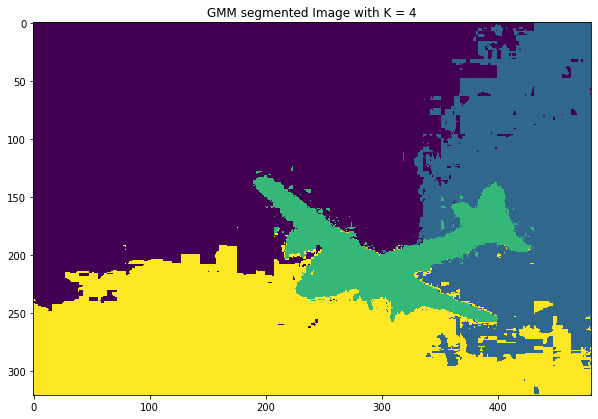

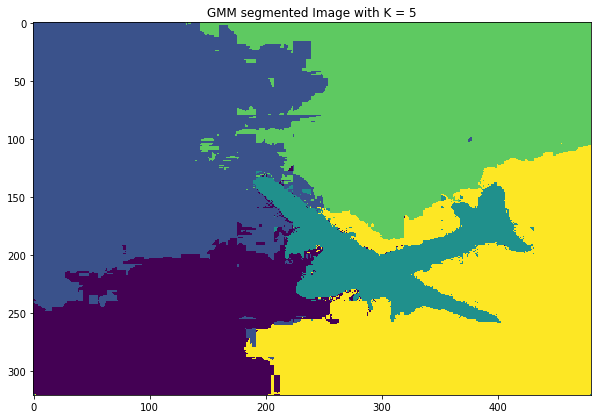

In [75]:

img = mpimg.imread('/content/EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg')


plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.title('Input Image')
plt.show()
segment(img)



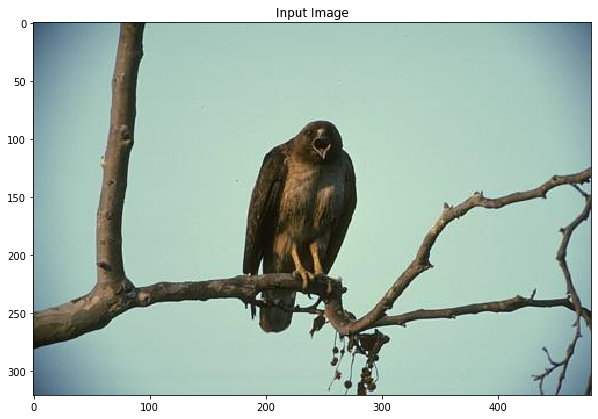

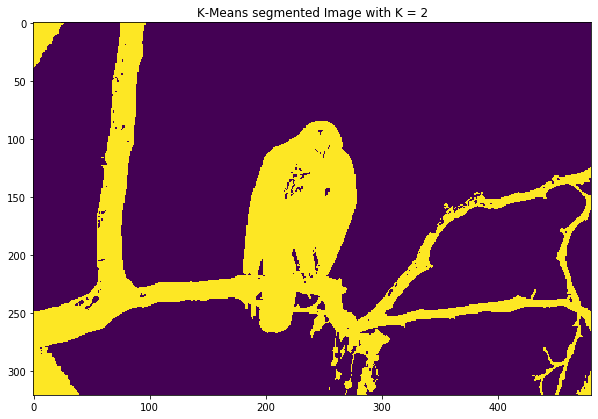

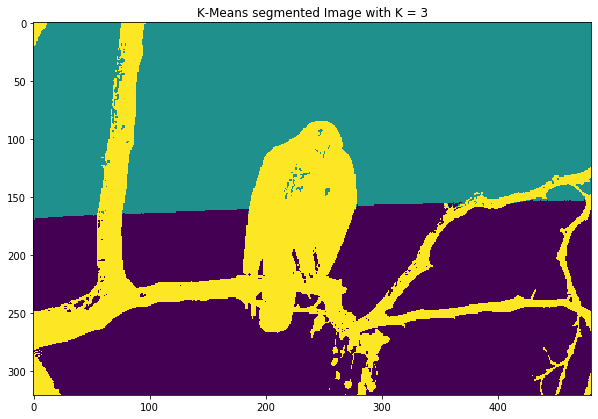

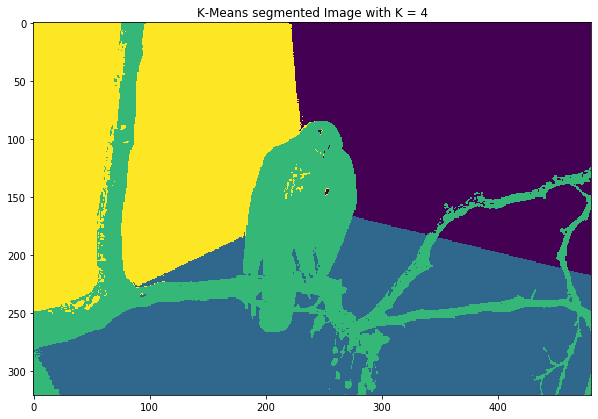

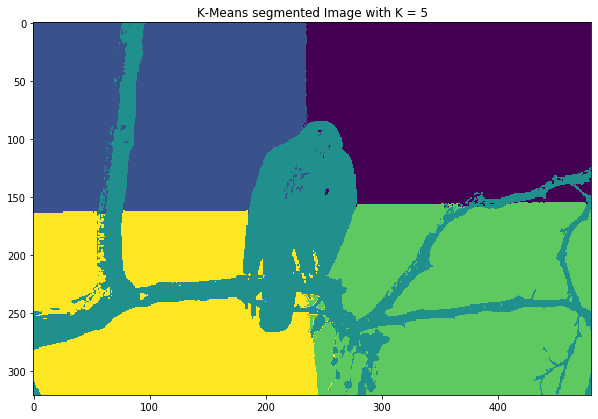

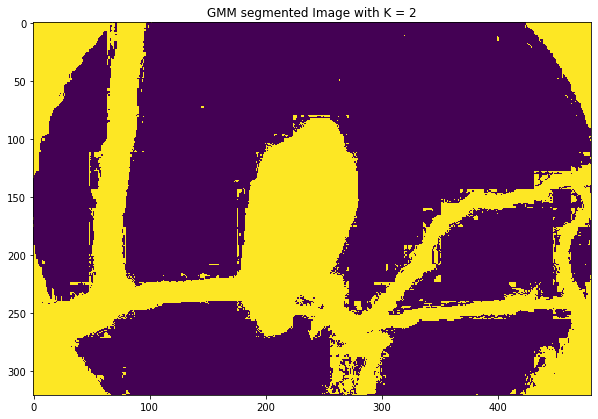

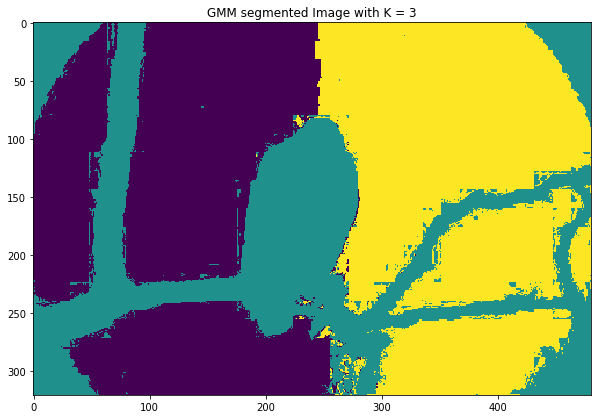

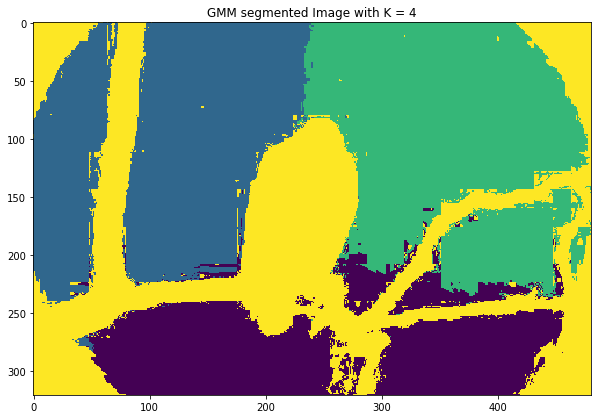

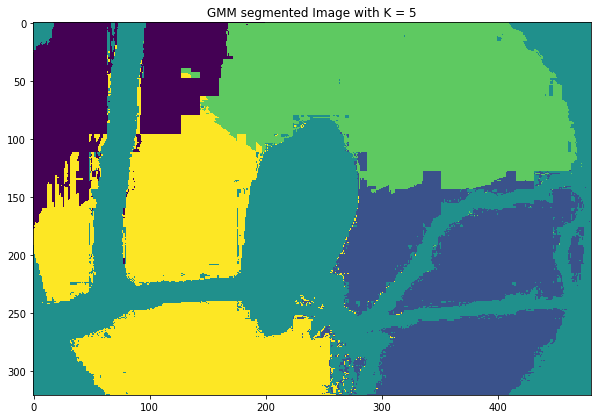

In [76]:

img = mpimg.imread('/content/EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg')

plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.title('Input Image')
plt.show()

segment(img)
